# Prediction Using Unsupervised ML(Task 2)- The Sparks Foundation

## Name: Jeevitha Sivadasan


### Unsupervised Machine Learning
Unsupervised Machine Learning is a technique to discover patterns and information that was previously undetected. Unlike supervised learning, users do not need to supervise the model. Unsupervised Machine Learning Algorithms are: clusterning, neural network etc.

Task is to predict the optimum number of clusters and represent it visually.




In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
%matplotlib inline

In [2]:
# Load the iris dataset
iris = pd.read_csv("C:/Users/jeevi/Downloads/Iris.csv")

In [3]:
iris.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# shape of the data
iris.shape

(150, 6)

Looking at the data, we can see that there is column 'Id' which is not necessary. So we are removing it using del method.

In [5]:
# removing a column
del iris['Id']

In [6]:
# shape of the data
iris.shape

(150, 5)

In [7]:
# checking total number of records for each species
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
# checking for null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# looking at the statistical measures 
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exploratory data analysis(EDA)

#### Bivariate analysis

##### Scatter plot

C:\Users\jeevi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


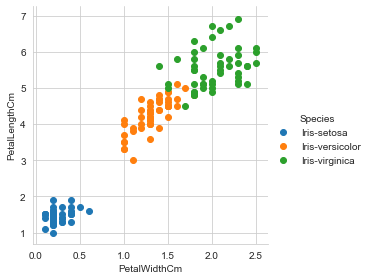

In [10]:
## Bivariate analysis
## Scatter plot between Petal width and petal length

sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4).map(plt.scatter, "PetalWidthCm", "PetalLengthCm").add_legend();
plt.show();

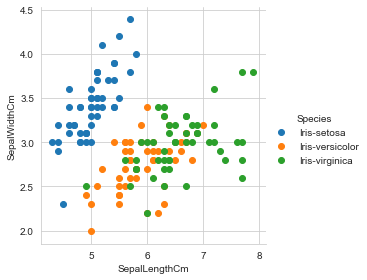

In [11]:
## Scatter plot between Sepal width and Sepal length
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="Species", size=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();
plt.show();

C:\Users\jeevi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


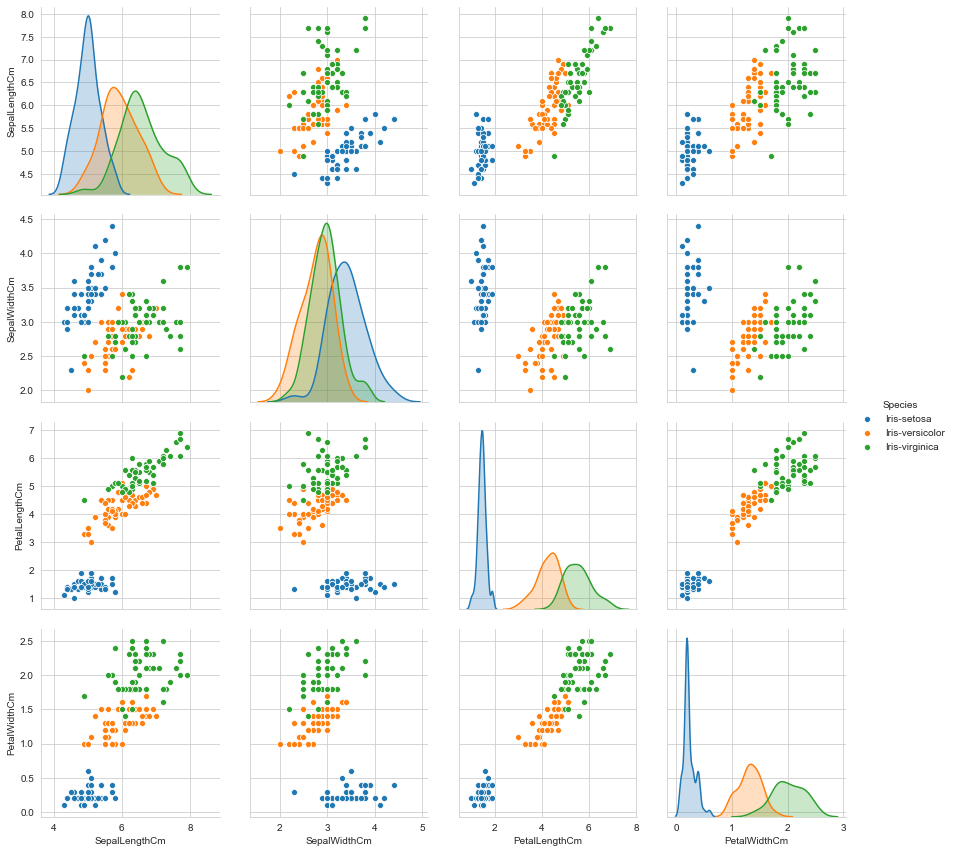

In [12]:
#Pair plot

plt.close()
sns.set_style("whitegrid");
sns.pairplot(iris, hue="Species", size=3);
plt.show()

###### Observation:

From the above pair plot we can see that,

1. Petal width and Petal Length of setosa species is easily separable.
2. Sepal width and Sepal Length of all three species is overlapped.
3. Petal length and petal width are more useful features to predict species type.

[]

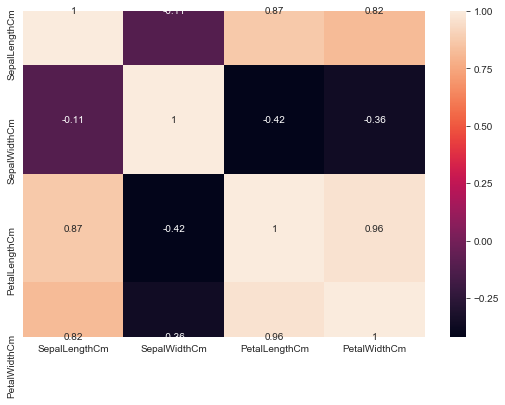

In [13]:
## heat map
plt.figure(figsize=(9,6))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

From the above heat map we can see that Sepal width and sepal length is slightly correlated with each other.

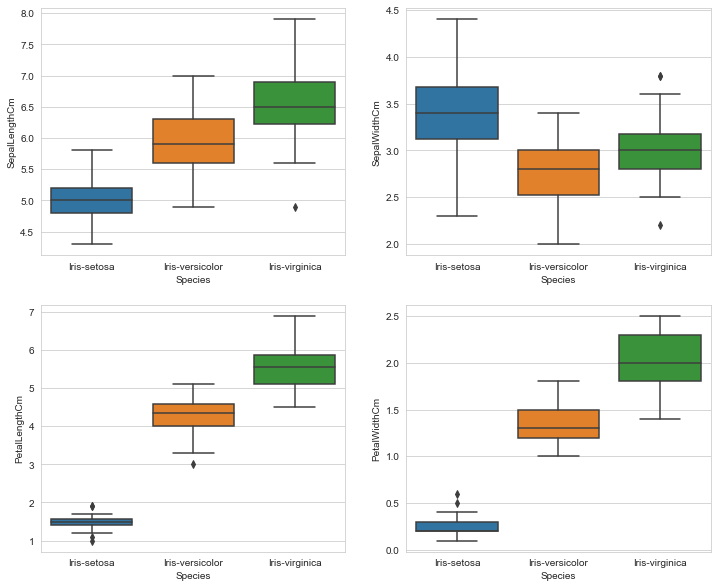

In [14]:
## Box plot
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x= 'Species',y= 'SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x= 'Species',y= 'SepalWidthCm' ,data=iris)
plt.subplot(2,2,3)
sns.boxplot(x= 'Species' ,y= 'PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y= 'PetalWidthCm',data=iris)


Above boxplot shows the distribution of the input variables and outliers.
From the boxplot we can see that iris-setosa is negatively skewed and have few outliers and other species are normally distributed.

## Predicting optimal number of clusters

There are different methods to predict optimal number of clusters. We are using **KMeans clustering** in this task. This is a partitioning clustering which requires the user to specify the number of clusters to be generated.

First we are implementing K-means clustering:

1. Choosimg number of clusters k
2. Select random points(k) as centroids
3. Assigning all the points to the closest cluster centroid.
4. Recompute the centroids of newly formed clusters.
Steps 3 and 4 are repeated

In [15]:
# KMeans
x = iris.iloc[:, [0, 1, 2, 3]].values
y = iris['Species']
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#### Elbow method to determine the optimal number of clusters:

Implementing elbow method:
1. For each clusters k, calculate the total WSS(within-cluster sum of square)
2. Plotting the curve according to the number of clusters k.
3. The point where the line bend in the plot is considered as appropriate number of clusters.

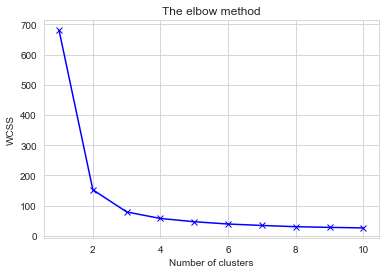

In [16]:
#elbow method
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

From the above Elbow method we can see that the line bend at the point 3. Therefore, we consider 3 as number of clusters.

In [17]:
# Fitting the K-means model

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

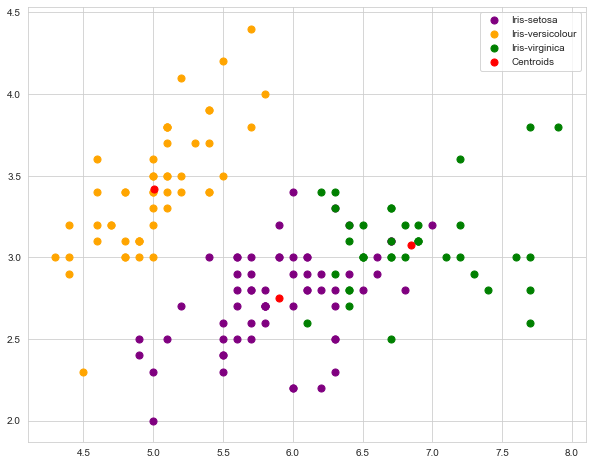

In [18]:
#Visualising the clusters
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

The red points are the centroids, we can identify the center points of the data by using following code:

In [19]:
centers = kmeans.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


We can compare the actual and predicted sepal length and width by plotting scatter plot.

In [20]:
# Encode for string labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

Text(0.5, 1.0, 'Predicted')

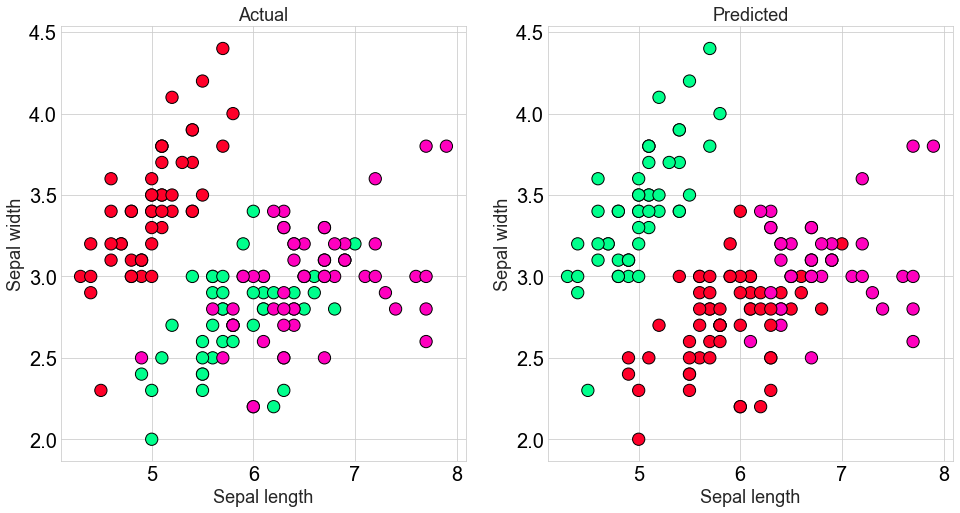

In [21]:
new_labels = kmeans.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x[:, 0], x[:, 1], c=new_labels, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

Therefore, the optimum number of clusters is predicted and represented visually. 

Thank you.